In [1]:
import sympy
sympy.init_printing()

We need to find the values of constants A,B in the cubic flux traffic equation with given values of $$\rho_{\rm max} , u_{\rm max}\ , u^{\star}$$  .

The derivation of the cubic flux traffic flux equation in the lesson 3 gives us 3 equations:
\begin{equation} 0 = u_{\rm max}\, \rho_{\rm max}(1 - A \rho_{\rm max} - B \rho_{\rm max}^2)\end{equation}


\begin{equation} 0  = u_{\rm max}(1 - 2A\rho^{\star} - 3B(\rho^{\star})^2)\end{equation}

\begin{equation}
u^{\star} = u_{\rm max}(1 - A \rho^{\star} - B(\rho^{\star})^2)\end{equation}

First, let's define variables

In [2]:
(u_max , rho_max ,rho_star,u_max, A, B, u_star ) = sympy.symbols('u_max rho_max rho_star u_max A B u_star')

Now the 3 equations

In [3]:
eq1 = sympy.Eq( 0, u_max*rho_max*(1 - A*rho_max-B*rho_max**2) )
eq2 = sympy.Eq( 0, u_max*(1 - 2*A*rho_star-3*B*rho_star**2) )
eq3 = sympy.Eq( u_star, u_max*(1 - A*rho_star - B*rho_star**2) )

Solving them for A and B, we obtain the following equations

In [4]:
eqA= sympy.Eq (0, (-3*u_max + 6*u_star) * A**2 + 3*(2*u_max-3*u_star)**2/(rho_max*u_max)*A - 3*(2*u_max-3*u_star)**2/(rho_max**2*u_max))
eqB_solved= sympy.solve(eq1,B)[0]

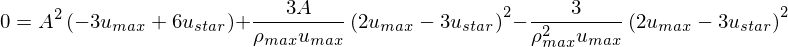

In [5]:
eqA

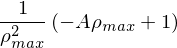

In [6]:
eqB_solved

In [7]:
eqA_solved = sympy.solve(eqA,A)

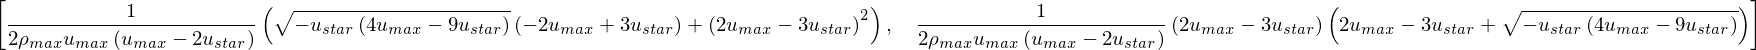

In [8]:
eqA_solved

The first solution used the positive root.
Now we can calculate the solution using the values given in the assignement.
\begin{align} 
\rho_{\rm max} &=15.0 \nonumber\\ u_{\rm max} &=2.0 \nonumber\\ u^{\star} &=1.5 \nonumber
\end{align}

In [9]:
Aval = eqA_solved[0].evalf(subs={u_star: 1.5, u_max:2.0, rho_max:15} )
Aval

In [10]:
Bval = eqB_solved.evalf(subs={rho_max: 15.0, A: Aval})
Bval

CODING ASSIGNEMENT

The PDE we need to solve is
\begin{equation}
\frac{\partial }{\partial t} \underline{\mathbf{u}} + \frac{\partial }{\partial x} \underline{\mathbf{f}} = 0
\end{equation}
Where
\begin{equation}\underline{\mathbf{u}} = \left[ \begin{array}{c}
\rho \\
\rho u \\
\rho e_T \\ 
\end{array} \right]\end{equation}
and
\begin{equation}\underline{\mathbf{f}} = \left[ \begin{array}{c}
\rho u \\
\rho u^2 + p \\
(\rho e_T + p) u \\ \end{array} \right]
\end{equation}
Using the equation of state for an ideal gas, we can calculate the pressure in term of $$e_T , \rho$$.

i.e. $$p = (\gamma -1)\left(\rho e_T - \frac{\rho u^2}{2}\right).$$

Now, we can write
$$\underline{\mathbf{u}} = 
\left[ \begin{array}{c}
u_1 \\
u_2 \\
u_3 \\ 
\end{array} \right] =
\left[ \begin{array}{c}
\rho \\
\rho u \\
\rho e_T \\ 
\end{array} \right]$$

$$\underline{\mathbf{f}} = \left[ \begin{array}{c}
f_1 \\
f_2 \\
f_3 \\ \end{array} \right] =
\left[ \begin{array}{c}
u_2\\
\frac{u^2_2}{u_1} + (\gamma -1)\left(u_3 - \frac{1}{2} \frac{u^2_2}{u_1} \right) \\
\left(u_3 + (\gamma -1)\left(u_3 - \frac{1}{2} \frac{u^2_2}{u_1}\right) \right) \frac{u_2}{u_1}\\ \end{array}
\right]$$

In [1]:
sympy.init_printing(use_latex=False)

NameError: name 'sympy' is not defined

Let's try to compute it.

In [2]:
%matplotlib inline
import numpy 
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [171]:
    #Code parameters#
nx = 81
dx = 20/(nx-1)
dt = 0.0002
nt = 50
gamma = 1.4


    #Initial conditions#
rhoL = 1
uL = 0
pL = 100000
rhoR = 0.125
uR = 0
pR = 10000


In [172]:
si
ve=5/(50*dt)
ve

500.0

In [173]:
def inicond(nx, rhoL,uL,pL,rhoR,uR,pR):
    """Computes the Shock Tube at t = 0: there's a left part,
         a right part and a discontinuity at x=0"""
    rho= numpy.zeros(nx)
    rho[0:]=rhoL
    rho[int((nx-1)/2):]=rhoR
    
    u= numpy.zeros(nx)
    u[0:]=uL
    u[int((nx-1)/2):]=uR
    
    p= numpy.zeros(nx)
    p[0:]=pL
    p[int((nx-1)/2):]=pR
    
    inivect = numpy.array([rho,u,p])
    return inivect

We will write down the u,f vectors in term of u1,2,3

In [174]:
#First, we need to calculate the eT value for all x using the state equation#
eT = numpy.zeros(nx)
rho = inicond(nx, rhoL,uL,pL,rhoR,uR,pR)[0]
u = inicond(nx, rhoL,uL,pL,rhoR,uR,pR)[1] 
p = inicond(nx, rhoL,uL,pL,rhoR,uR,pR)[2]

eT[0:] = p[0:]/(gamma-1) /rho[0:] + 0.5*u[0]**2  


In [175]:
#We create the vectors U and F#
u1 = rho
u2 = rho * u
u3 = rho * eT
U = numpy.array([u1,u2,u3])

def computeF(U):
    f1 = U[1]
    f2 = U[1]**2/U[0] + (gamma-1) * (U[2] -0.5*U[1] **2/U[0])
    f3 = (U[2] +(gamma-1)*(U[2] - 0.5*U[1]**2/U[0]))*U[1]/U[0]
    F = numpy.array([f1,f2,f3])
    return F
F=computeF(U)


In [177]:
#Now we compute the Richtmyer method#
def richtmyer(U):
    
    U_n = numpy.zeros((nt,len(U),nx))
    U_half = numpy.empty_like(U)
    U_n[:,:] = U.copy()
    U_half =U.copy()
    
    for t in range(1,nt):
        F= computeF(U)
        U_half[0:,1:] = 0.5*(U[0:,1:]+U[0:,:-1]) - dt/(2*dx) * (F[0:,1:]-F[0:,:-1])
        F_half= computeF(U_half)
        U_n[t,0:,:-1] = U[0:,:-1] - dt/dx * (F_half[0:,1:]-F_half[0:,:-1])
        U = U_n[t].copy()
    return U_n
#I copied the global pattern of this function from the MacCormack function from lesson 2#
#We will be able to do some cool animations with it#

In [178]:
U_n = richtmyer(U)

In [179]:
#Uc is a vector containing information on density, velocity and pressure in space and time#
Uc = numpy.empty_like(U_n)
Uc[0:,0,0:] = U_n[0:,0,0:]
Uc[0:,1,0:] = U_n[0:,1,0:]/U_n[0:,0,0:]
Uc[0:,2,0:] = (gamma-1) * (U_n[0:,2,0:]- U_n[0:,1,0:]**2 /U_n[0:,0,0:]/2)

Let's place our results on animations

In [180]:
from matplotlib import animation
from IPython.display import HTML
def animate(data):
    x = numpy.linspace(-10,10,nx)
    y = data
    line.set_data(x,y)
    return line,

Density

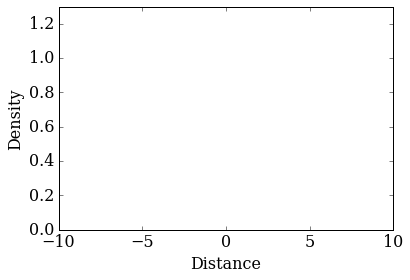

In [181]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(-10,10),ylim=(0,1.3),xlabel=('Distance'),ylabel=('Density'));
line, = ax.plot([],[],color='#003366', lw=2);

In [182]:
anim = animation.FuncAnimation(fig, animate, frames=Uc[0:,0,0:], interval=20)
HTML(anim.to_html5_video())

Velocity

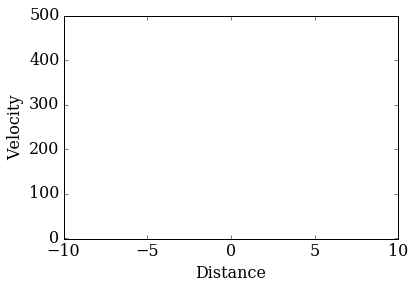

In [183]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(-10,10),ylim=(-1,500),xlabel=('Distance'),ylabel=('Velocity'));
line, = ax.plot([],[],color='#003366', lw=2);

In [197]:
anim = animation.FuncAnimation(fig, animate, frames=Uc[0:,1,0:], interval=20)
HTML(anim.to_html5_video())

In [187]:
FF= numpy.empty_like(U_n)
for i in range(0,50):
    FF[i]= computeF(U_n[i])

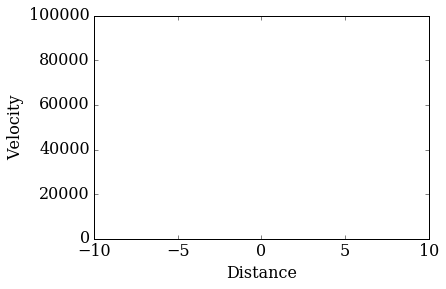

In [189]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(-10,10),ylim=(-1,100000),xlabel=('Distance'),ylabel=('Velocity'));
line, = ax.plot([],[],color='#003366', lw=2);


In [190]:
anim = animation.FuncAnimation(fig, animate, frames=FF[0:,1,0:], interval=20)
HTML(anim.to_html5_video())

PRESSURE

In [ ]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(-10,10),ylim=(0,110000),xlabel=('Distance'),ylabel=('Pressure'));
line, = ax.plot([],[],color='#003366', lw=2);

In [ ]:
anim = animation.FuncAnimation(fig, animate, frames=Uc[0:,2,0:], interval=20)
HTML(anim.to_html5_video())

We observe a behaviour similar to the analytic solution for density, velocity, pressure. However, there are 2 types of "Gibb's phenomenon" seen at shocks. If the function itself is discontinuous, we see an oscillating wave propagating near the discontinuity point. If the derivative of the function is discontinuous, there's an oriented bump at that point. We notice that the bumps are much more localised than the oscillating waves.


Here we find the values asked in the assignement

In [63]:
Uc[50,1,50]

292.61147152682679

In [64]:
Uc[50,2,50]

30250.890167572015

In [65]:
Uc[50,0,50]

0.37469140264760109

Let's try different initial conditions

In [194]:
def rim(rhoL,uL,pL,rhoR,uR,pR):
    eT = numpy.zeros(nx)
    rho = inicond(nx, rhoL,uL,pL,rhoR,uR,pR)[0]
    u = inicond(nx, rhoL,uL,pL,rhoR,uR,pR)[1] 
    p = inicond(nx, rhoL,uL,pL,rhoR,uR,pR)[2]

    eT[0:] = p[0:]/(gamma-1) /rho[0:] + 0.5*u[0]**2
    
    u1 = rho
    u2 = rho * u
    u3 = rho * eT
    U = numpy.array([u1,u2,u3])
    U_n = Rime(U)
    
    Uc = numpy.empty_like(U_n)
    Uc[0:,0,0:] = U_n[0:,0,0:]
    Uc[0:,1,0:] = U_n[0:,1,0:]/U_n[0:,0,0:]
    Uc[0:,2,0:] = (gamma-1) * (U_n[0:,2,0:]- U_n[0:,0,0:]* U_n[0:,1,0:]**2/2)
    
    return Uc

In [223]:
    #Code parameters#
nx = 81
dx = 20/(nx-1)
dt = 0.0002
nt = 60
gamma = 1.4


    #Initial conditions#
rhoL = 1
uL = 0
pL = 100000
rhoR = 0.125
uR = 0
pR = 10000


Let's discute the convergence of the solution.
As we saw on animations, solutions for velocity, pressure and density partially had waves (density even 2 of them, one slower and one faster). Obviously, this imposes conditions on the ratio dt/dx given by the wave's speed and the CFL number.
However, given the equations, the wave's speed doesn't come up directly.
First, we're going to make approximative calculations to see what direction we should take.
The Velocity-Distance animation (and the graph given for the analytical solution in lesson 3.5) gives us an approximative value of 290 for the wave velocity moving rightway. Let's see if how the solution behaves when v= 300 and CFL = 1

C:\Users\Chopin\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: RuntimeWarning: overflow encountered in multiply


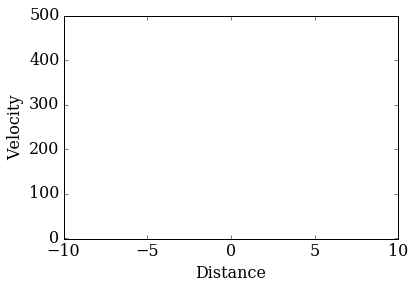

In [224]:
cfl=1
v= 330
dt=cfl*dx/v

Uc= rim(rhoL,uL,pL,rhoR,uR,pR)

fig = pyplot.figure();
ax = pyplot.axes(xlim=(-10,10),ylim=(-1,500),xlabel=('Distance'),ylabel=('Velocity'));
line, = ax.plot([],[],color='#003366', lw=2);

In [225]:
anim = animation.FuncAnimation(fig, animate, frames=Uc[0:,1,0:], interval=20)
HTML(anim.to_html5_video())

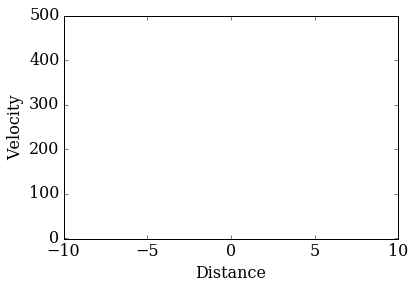

In [226]:
#The solution rapidly blows up. Maybe CFL=0.5? (I had to augment the v a little bit too, so it is bigger than the bumps from #
#the "Gibb's phenomenon")#
cfl=.5
v= 350
dt=cfl*dx/v

Uc= rim(rhoL,uL,pL,rhoR,uR,pR)

fig = pyplot.figure();
ax = pyplot.axes(xlim=(-10,10),ylim=(-1,500),xlabel=('Distance'),ylabel=('Velocity'));
line, = ax.plot([],[],color='#003366', lw=2);

In [227]:
anim = animation.FuncAnimation(fig, animate, frames=Uc[0:,1,0:], interval=20)
HTML(anim.to_html5_video())